In [33]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [34]:
otter_data_csv = "./Resources/actual_otter_data.csv"

In [35]:
otter_data = pd.read_csv(otter_data_csv)

In [36]:
otter_data_df = pd.DataFrame(otter_data)

In [37]:
otter_data_df.dtypes

Location          object
Survey #           int64
Camera #          object
SD Card           object
Animal Sighted    object
Animal Count       int64
dtype: object

In [38]:
list(otter_data_df.columns)

['Location',
 'Survey #',
 'Camera #',
 'SD Card',
 'Animal Sighted',
 'Animal Count']

In [39]:
animal_sighted_list = otter_data_df["Animal Sighted"].unique()
animal_sighted_list

animal_sighted_list_sorted = sorted(animal_sighted_list)
animal_sighted_list_sorted

['American Coot',
 'American Dipper',
 'American Wigeon',
 'Bald Eagle',
 'Bat',
 'Beaver',
 'Bee',
 'Black Bear',
 'Bobcat',
 "Bullock's Oriole",
 'Butterflies',
 'Canada Goose',
 'Cat',
 'Common Goldeneye',
 'Common Merghansar',
 'Common Merghanser',
 'Cow',
 'Coyote',
 'Dark-eyed Junco',
 'Domestic Cat',
 'Domestic Dog',
 'Dragonfly',
 'Eagle',
 'Elk',
 'Finch',
 'Fireflies',
 'Fish (unidentified)',
 'Fox',
 'Gadwall Ducks',
 'Great Blue Heron',
 'Great-Tailed Grackle',
 'Hawk',
 'Hawk (unidentified)',
 'House Cat',
 'Hummingbird',
 'Killdeer',
 'Magpie',
 'Mallard Duck',
 'Mallard Ducks',
 'Mink',
 'Moth',
 'Mountain Lion',
 'Mourning Cloak Butterfly',
 'Mourning Dove',
 'Mouse',
 'Mule Deer',
 'Muskrat',
 'Osprey',
 'Otter',
 'Owl',
 'Pelican',
 'Pelicans',
 'Raccoon',
 'Red-Winged Blackbird',
 'Robin',
 'Rodent (unknown species)',
 'Sandhill Crane',
 'Sea Gull',
 'Skunk',
 'Sparrow',
 'Spider',
 'Spotted Sandpiper',
 'Swallow',
 'Swallows',
 'Trout',
 'Unidentified Bird',
 'Unide

In [40]:
cleaned_otter_data_df = otter_data_df.replace(
    {"Common Merghansar": "Common Merghanser", 
     "Cat": "Domestic Cat", "House Cat": "Domestic Cat", 
     "Hawk": "Hawk (unidentified)",
     "Mallard Ducks": "Mallard Duck",
     "Pelicans": "Pelican",
     "Rodent (unknown species)": "Unidentified Rodent", "Rodent (unidentified)": "Unidentified Rodent",
     "Swallows": "Swallow",
     "Unidentified bird": "Unidentified Bird", "Unknown Bird": "Unidentified Bird",
     "Unknown Mammal": "Unidentified Mammal",
     "Fish (unidentified)": "Unidentified Fish",  
})
cleaned_otter_data_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
0,Lower Provo River,1,1,NaN,Raccoon,1
1,Lower Provo River,1,1,NaN,Domestic Cat,1
2,Lower Provo River,1,1,NaN,Unidentified Duck,1
3,Lower Provo River,1,2,NaN,Mink,1
4,Lower Provo River,1,2,NaN,Raccoon,1
...,...,...,...,...,...,...
304,Weber River,7,1,NaN,Mule Deer,1
305,Weber River,8,1,NaN,Raccoon,1
306,Weber River,8,1,NaN,Beaver,1
307,Weber River,8,1,NaN,Muskrat,1


In [41]:
cleaned_animal_sighted_list = cleaned_otter_data_df["Animal Sighted"].unique()
cleaned_animal_sighted_list

cleaned_animal_sighted_list_sorted = sorted(cleaned_animal_sighted_list)
cleaned_animal_sighted_list_sorted

['American Coot',
 'American Dipper',
 'American Wigeon',
 'Bald Eagle',
 'Bat',
 'Beaver',
 'Bee',
 'Black Bear',
 'Bobcat',
 "Bullock's Oriole",
 'Butterflies',
 'Canada Goose',
 'Common Goldeneye',
 'Common Merghanser',
 'Cow',
 'Coyote',
 'Dark-eyed Junco',
 'Domestic Cat',
 'Domestic Dog',
 'Dragonfly',
 'Eagle',
 'Elk',
 'Finch',
 'Fireflies',
 'Fox',
 'Gadwall Ducks',
 'Great Blue Heron',
 'Great-Tailed Grackle',
 'Hawk (unidentified)',
 'Hummingbird',
 'Killdeer',
 'Magpie',
 'Mallard Duck',
 'Mink',
 'Moth',
 'Mountain Lion',
 'Mourning Cloak Butterfly',
 'Mourning Dove',
 'Mouse',
 'Mule Deer',
 'Muskrat',
 'Osprey',
 'Otter',
 'Owl',
 'Pelican',
 'Raccoon',
 'Red-Winged Blackbird',
 'Robin',
 'Sandhill Crane',
 'Sea Gull',
 'Skunk',
 'Sparrow',
 'Spider',
 'Spotted Sandpiper',
 'Swallow',
 'Trout',
 'Unidentified Bird',
 'Unidentified Dove',
 'Unidentified Duck',
 'Unidentified Fish',
 'Unidentified Mammal',
 'Unidentified Rodent',
 'Wasp',
 "Wilson's Snipe",
 'Wood Duck',
 

In [42]:
animal_sighted_totals_df = pd.DataFrame(cleaned_otter_data_df["Animal Sighted"].value_counts())
animal_sighted_totals_df.columns =["Count"]
animal_sighted_totals_df

,Count
Animal Sighted,
Mule Deer,36
Raccoon,34
Great Blue Heron,26
Mallard Duck,19
Muskrat,16
...,...
Dark-eyed Junco,1
Yellow Headed Blackbird,1
Elk,1


In [43]:
total_animal_sightings_count = cleaned_otter_data_df["Animal Sighted"].count()
total_animal_sightings_count

309

In [44]:
# Create a new column for sighting probability for each animal sighted:
animal_sighted_totals_df["Sighting Probability"] = animal_sighted_totals_df["Count"] / total_animal_sightings_count
overall_sighting_probabilities = animal_sighted_totals_df
overall_sighting_probabilities

,Count,Sighting Probability
Animal Sighted,,
Mule Deer,36,0.116505
Raccoon,34,0.110032
Great Blue Heron,26,0.084142
Mallard Duck,19,0.061489
Muskrat,16,0.051780
...,...,...
Dark-eyed Junco,1,0.003236
Yellow Headed Blackbird,1,0.003236
Elk,1,0.003236


Text(0, 0.5, 'Number of Sightings')

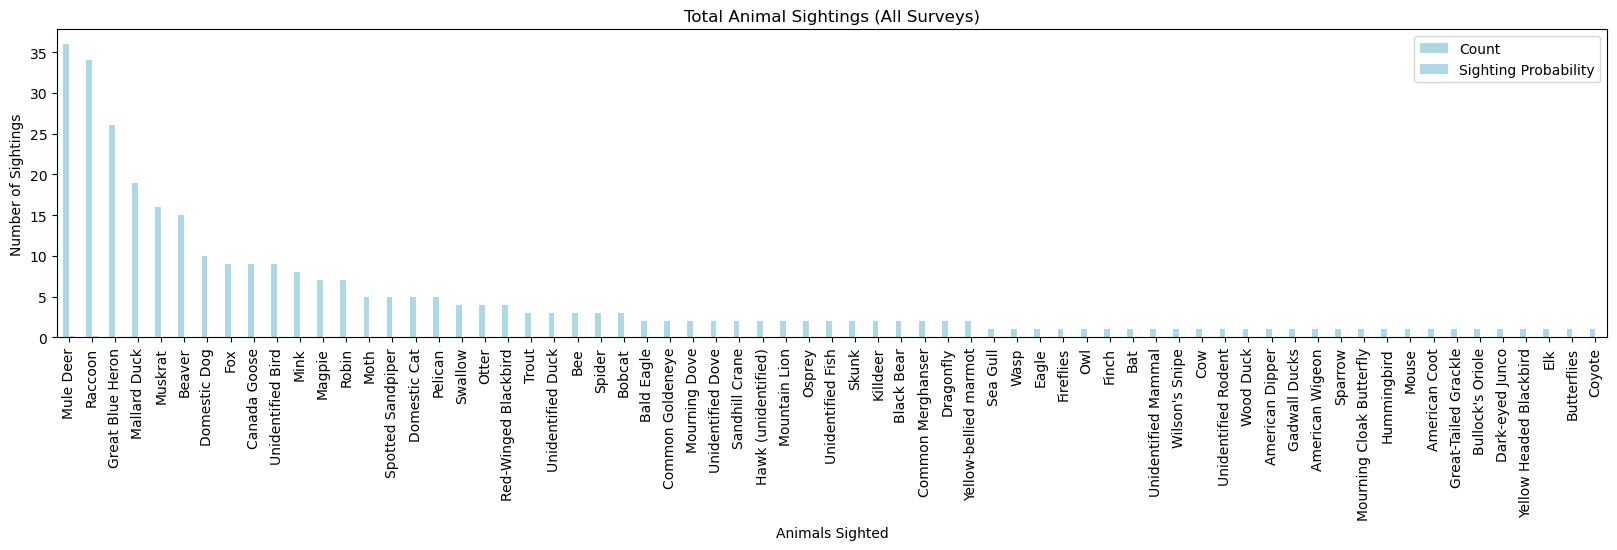

In [46]:
animal_sighted_totals_df_graph = animal_sighted_totals_df.plot(kind="bar", facecolor="lightblue", figsize=(20,4))
plt.title("Total Animal Sightings (All Surveys)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")

Text(0, 0.5, 'Number of Sightings')

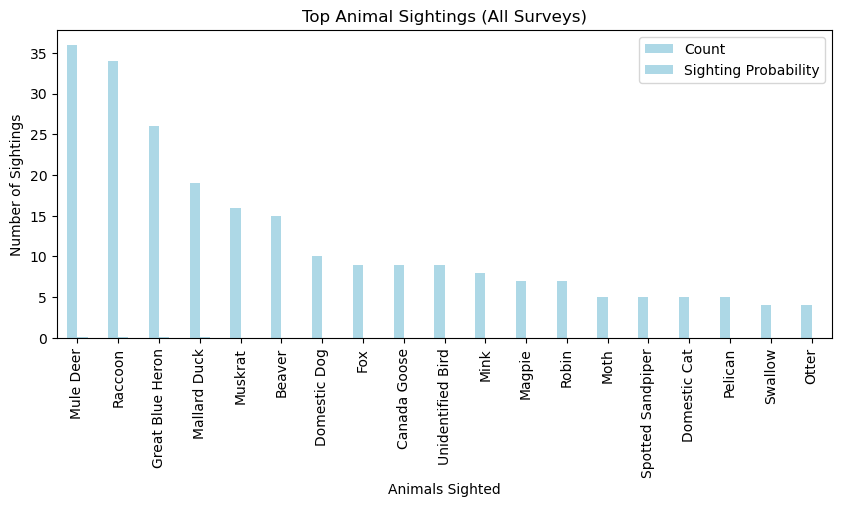

In [48]:
top_animal_sighted_totals_df_graph = animal_sighted_totals_df.head(19).plot(kind="bar", facecolor="lightblue", figsize=(10,4))
plt.title("Top Animal Sightings (All Surveys)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")

Text(0, 0.5, 'Number of Sightings')

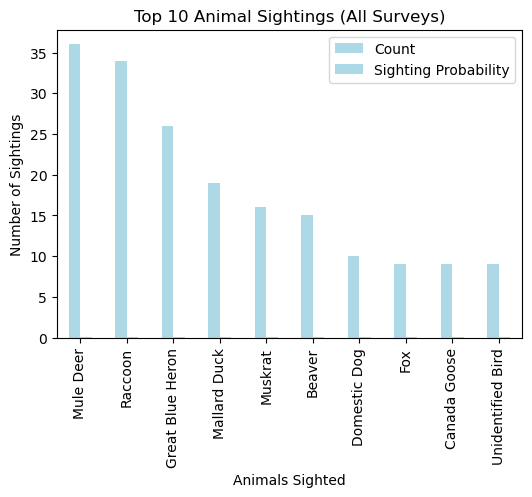

In [49]:
top_ten_animal_sighted_totals_df_graph = animal_sighted_totals_df.head(10).plot(kind="bar", facecolor="lightblue", figsize=(6,4))
plt.title("Top 10 Animal Sightings (All Surveys)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")

In [50]:
lower_provo_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Lower Provo River"]
lower_provo_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
0,Lower Provo River,1,1,NaN,Raccoon,1
1,Lower Provo River,1,1,NaN,Domestic Cat,1
2,Lower Provo River,1,1,NaN,Unidentified Duck,1
3,Lower Provo River,1,2,NaN,Mink,1
4,Lower Provo River,1,2,NaN,Raccoon,1
...,...,...,...,...,...,...
63,Lower Provo River,19,NaN,A,Raccoon,1
64,Lower Provo River,19,NaN,A,Dragonfly,1
65,Lower Provo River,19,NaN,A,Mourning Cloak Butterfly,1
66,Lower Provo River,19,NaN,A,Hummingbird,1


In [51]:
lpr_animal_sighted_totals_df = pd.DataFrame(lower_provo_river_df["Animal Sighted"].value_counts())
lpr_animal_sighted_totals_df.columns =["Count"]
lpr_animal_sighted_totals_df


,Count
Animal Sighted,
Raccoon,10
Muskrat,6
Mallard Duck,6
Unidentified Bird,5
Mink,4
Mule Deer,4
Unidentified Duck,3
Great Blue Heron,3
Moth,3


In [53]:
lpr_total_animal_sightings_count = lower_provo_river_df["Animal Sighted"].count()
lpr_total_animal_sightings_count

68

In [54]:
# Create a new column for sighting probability for each animal sighted in the lower provo river:
lpr_animal_sighted_totals_df["Sighting Probability"] = lpr_animal_sighted_totals_df["Count"] / lpr_total_animal_sightings_count
lpr_sighting_probabilities = lpr_animal_sighted_totals_df
lpr_sighting_probabilities

,Count,Sighting Probability
Animal Sighted,,
Raccoon,10,0.147059
Muskrat,6,0.088235
Mallard Duck,6,0.088235
Unidentified Bird,5,0.073529
Mink,4,0.058824
Mule Deer,4,0.058824
Unidentified Duck,3,0.044118
Great Blue Heron,3,0.044118
Moth,3,0.044118


(0.0, 25.0)

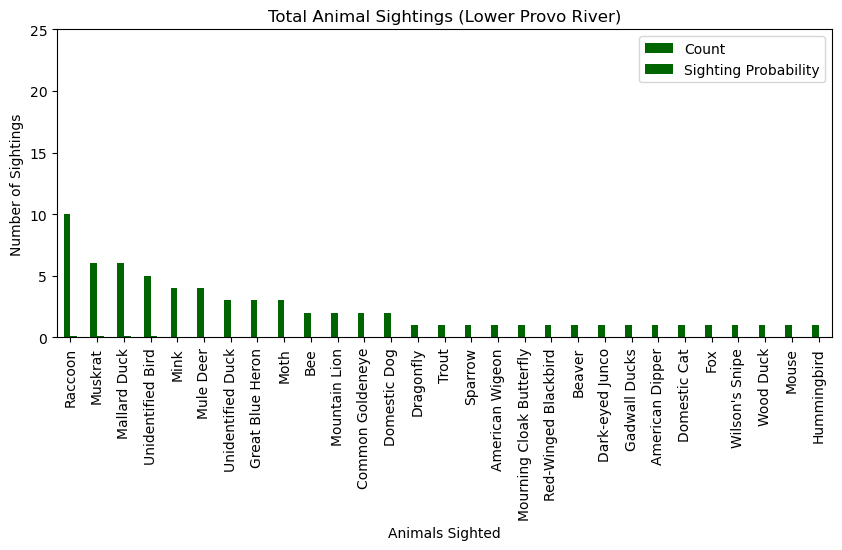

In [56]:
lpr_lpr_animal_sighted_totals_df_graph = lpr_animal_sighted_totals_df.plot(kind="bar", facecolor="darkgreen", figsize=(10,4))
plt.title("Total Animal Sightings (Lower Provo River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [57]:
lpr_survey_number_list = lower_provo_river_df["Survey #"].unique()

lpr_survey_number_list_sorted = sorted(lpr_survey_number_list)
lpr_survey_number_list_sorted

[1, 2, 3, 4, 6, 8, 10, 19]

In [96]:
lpr_survey_number_totals_df = pd.DataFrame(lower_provo_river_df["Survey #"].value_counts())
lpr_survey_number_totals_df.columns =["Animal Sightings Count"]
lpr_survey_number_totals_df

,Animal Sightings Count
Survey #,
3,18
1,12
2,11
4,10
19,7
10,5
8,3
6,2


In [98]:
lpr_animal_sightings_mean = lpr_survey_number_totals_df.loc[:, "Animal Sightings Count"].mean()
lpr_animal_sightings_mean

8.5

In [58]:
middle_provo_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Middle Provo River"]
middle_provo_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
68,Middle Provo River,5,3,NaN,Great Blue Heron,1
69,Middle Provo River,5,3,NaN,Raccoon,2
70,Middle Provo River,5,3,NaN,Mule Deer,1
71,Middle Provo River,5,3,NaN,Muskrat,1
72,Middle Provo River,5,3,NaN,Canada Goose,1
...,...,...,...,...,...,...
250,Middle Provo River,32,New 1,NaN,Canada Goose,1
251,Middle Provo River,32,New 1,NaN,Trout,1
252,Middle Provo River,32,New 1,NaN,Eagle,1
253,Middle Provo River,32,New 2,NaN,Great Blue Heron,1


In [59]:
mpr_animal_sighted_totals_df = pd.DataFrame(middle_provo_river_df["Animal Sighted"].value_counts())
mpr_animal_sighted_totals_df.columns =["Count"]
mpr_animal_sighted_totals_df

,Count
Animal Sighted,
Mule Deer,24
Great Blue Heron,22
Raccoon,18
Mallard Duck,12
Canada Goose,9
Beaver,8
Domestic Dog,7
Robin,7
Spotted Sandpiper,5


In [60]:
mpr_total_animal_sightings_count = middle_provo_river_df["Animal Sighted"].count()
mpr_total_animal_sightings_count

187

In [61]:
# Create a new column for sighting probability for each animal sighted in the middle provo river:
mpr_animal_sighted_totals_df["Sighting Probability"] = mpr_animal_sighted_totals_df["Count"] / mpr_total_animal_sightings_count
mpr_sighting_probabilities = mpr_animal_sighted_totals_df
mpr_sighting_probabilities

,Count,Sighting Probability
Animal Sighted,,
Mule Deer,24,0.128342
Great Blue Heron,22,0.117647
Raccoon,18,0.096257
Mallard Duck,12,0.064171
Canada Goose,9,0.048128
Beaver,8,0.042781
Domestic Dog,7,0.037433
Robin,7,0.037433
Spotted Sandpiper,5,0.026738


In [62]:
mpr_survey_number_list = middle_provo_river_df["Survey #"].unique()

mpr_survey_number_list_sorted = sorted(mpr_survey_number_list)
mpr_survey_number_list_sorted

[5,
 7,
 9,
 11,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 32]

In [63]:
mpr_animal_sighted_totals = middle_provo_river_df["Animal Sighted"].value_counts()
mpr_animal_sighted_totals

Animal Sighted
Mule Deer                  24
Great Blue Heron           22
Raccoon                    18
Mallard Duck               12
Canada Goose                9
Beaver                      8
Domestic Dog                7
Robin                       7
Spotted Sandpiper           5
Fox                         5
Magpie                      5
Pelican                     5
Muskrat                     5
Otter                       4
Spider                      3
Domestic Cat                3
Unidentified Bird           3
Mink                        3
Red-Winged Blackbird        3
Mourning Dove               2
Yellow-bellied marmot       2
Unidentified Dove           2
Sandhill Crane              2
Trout                       2
Swallow                     2
Osprey                      2
Skunk                       2
Killdeer                    2
Moth                        1
Unidentified Fish           1
Fireflies                   1
Dragonfly                   1
Hawk (unidentified)      

(0.0, 25.0)

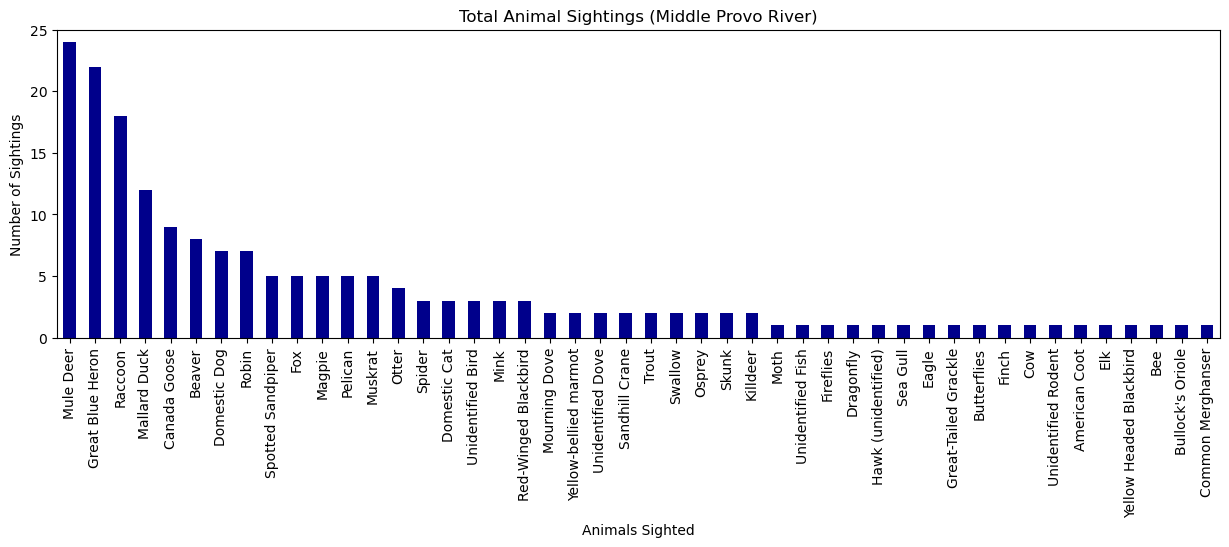

In [64]:
mpr_animal_sighted_totals_graph = mpr_animal_sighted_totals.plot(kind="bar", facecolor="darkblue", figsize=(15,4))
plt.title("Total Animal Sightings (Middle Provo River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [65]:
strawberry_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Strawberry River"]
strawberry_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
255,Strawberry River,1,8,NaN,Mule Deer,1
256,Strawberry River,1,8,NaN,Mallard Duck,1
257,Strawberry River,1,8,NaN,Swallow,1
258,Strawberry River,1,8,NaN,Bat,1
259,Strawberry River,1,9,NaN,Swallow,1
260,Strawberry River,1,9,NaN,Muskrat,1
261,Strawberry River,1,9,NaN,Unidentified Fish,1
262,Strawberry River,1,9,NaN,Magpie,1
263,Strawberry River,1,9,NaN,Unidentified Mammal,1
264,Strawberry River,2,8 or 9,NaN,Mule Deer,1


In [66]:
sr_animal_sighted_totals_df = pd.DataFrame(strawberry_river_df["Animal Sighted"].value_counts())
sr_animal_sighted_totals_df.columns =["Count"]
sr_animal_sighted_totals_df

,Count
Animal Sighted,
Mule Deer,5
Bobcat,3
Magpie,2
Fox,2
Bald Eagle,2
Black Bear,2
Muskrat,2
Swallow,2
Unidentified Fish,1


In [67]:
sr_total_animal_sightings_count = strawberry_river_df["Animal Sighted"].count()
sr_total_animal_sightings_count

32

In [68]:
# Create a new column for sighting probability for each animal sighted in the strawberry river:
sr_animal_sighted_totals_df["Sighting Probability"] = sr_animal_sighted_totals_df["Count"] / sr_total_animal_sightings_count
sr_sighting_probabilities = sr_animal_sighted_totals_df
sr_sighting_probabilities

,Count,Sighting Probability
Animal Sighted,,
Mule Deer,5,0.15625
Bobcat,3,0.09375
Magpie,2,0.06250
Fox,2,0.06250
Bald Eagle,2,0.06250
Black Bear,2,0.06250
Muskrat,2,0.06250
Swallow,2,0.06250
Unidentified Fish,1,0.03125


In [69]:
sr_survey_number_list = strawberry_river_df["Survey #"].unique()

sr_survey_number_list_sorted = sorted(sr_survey_number_list)
sr_survey_number_list_sorted

[1, 2, 3, 4, 5]

In [70]:
sr_animal_sighted_totals = strawberry_river_df["Animal Sighted"].value_counts()
sr_animal_sighted_totals

Animal Sighted
Mule Deer              5
Bobcat                 3
Magpie                 2
Fox                    2
Bald Eagle             2
Black Bear             2
Muskrat                2
Swallow                2
Unidentified Fish      1
Unidentified Mammal    1
Common Merghanser      1
Mallard Duck           1
Great Blue Heron       1
Bat                    1
Moth                   1
Hawk (unidentified)    1
Wasp                   1
Unidentified Bird      1
Beaver                 1
Owl                    1
Name: count, dtype: int64

(0.0, 25.0)

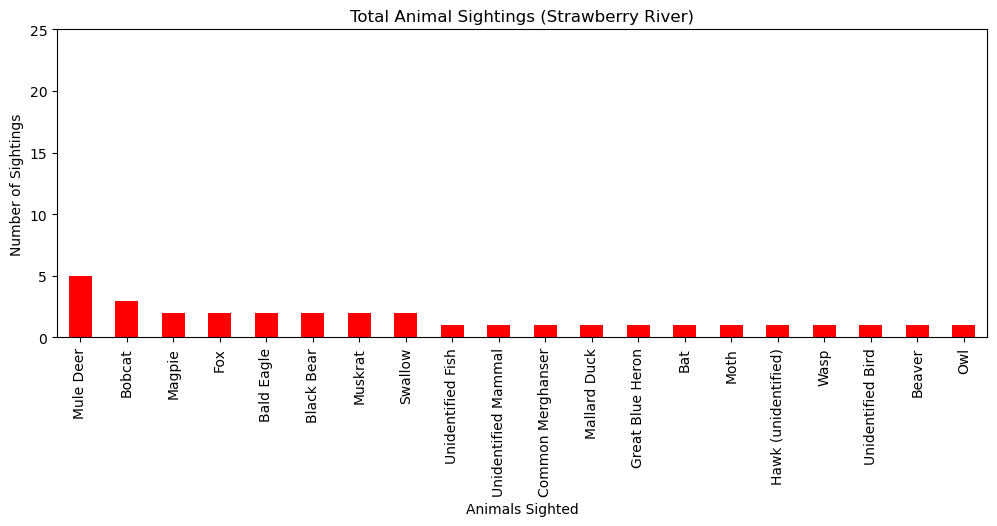

In [71]:
sr_animal_sighted_totals_graph = sr_animal_sighted_totals.plot(kind="bar", facecolor="red", figsize=(12,4))
plt.title("Total Animal Sightings (Strawberry River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [72]:
weber_river_df = cleaned_otter_data_df[cleaned_otter_data_df["Location"] == "Weber River"]
weber_river_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
287,Weber River,1,1,NaN,Raccoon,1
288,Weber River,1,2,NaN,Raccoon,1
289,Weber River,2,1,NaN,Mule Deer,1
290,Weber River,2,1,NaN,Beaver,1
291,Weber River,2,1,NaN,Muskrat,1
292,Weber River,2,2,NaN,Raccoon,1
293,Weber River,2,2,NaN,Beaver,1
294,Weber River,2,2,NaN,Coyote,1
295,Weber River,2,2,NaN,Fox,1
296,Weber River,2,2,NaN,Mink,1


In [73]:
wr_animal_sighted_totals_df = pd.DataFrame(weber_river_df["Animal Sighted"].value_counts())
wr_animal_sighted_totals_df.columns =["Count"]
wr_animal_sighted_totals_df

,Count
Animal Sighted,
Raccoon,6
Beaver,5
Mule Deer,3
Muskrat,3
Coyote,1
Fox,1
Mink,1
Domestic Cat,1
Domestic Dog,1


In [74]:
wr_total_animal_sightings_count = weber_river_df["Animal Sighted"].count()
wr_total_animal_sightings_count

22

In [75]:
# Create a new column for sighting probability for each animal sighted in the weber river:
wr_animal_sighted_totals_df["Sighting Probability"] = wr_animal_sighted_totals_df["Count"] / wr_total_animal_sightings_count
wr_sighting_probabilities = wr_animal_sighted_totals_df
wr_sighting_probabilities

,Count,Sighting Probability
Animal Sighted,,
Raccoon,6,0.272727
Beaver,5,0.227273
Mule Deer,3,0.136364
Muskrat,3,0.136364
Coyote,1,0.045455
Fox,1,0.045455
Mink,1,0.045455
Domestic Cat,1,0.045455
Domestic Dog,1,0.045455


In [76]:
wr_survey_number_list = weber_river_df["Survey #"].unique()

wr_survey_number_list_sorted = sorted(wr_survey_number_list)
wr_survey_number_list_sorted

[1, 2, 3, 4, 6, 7, 8]

In [77]:
wr_animal_sighted_totals = weber_river_df["Animal Sighted"].value_counts()
wr_animal_sighted_totals

Animal Sighted
Raccoon         6
Beaver          5
Mule Deer       3
Muskrat         3
Coyote          1
Fox             1
Mink            1
Domestic Cat    1
Domestic Dog    1
Name: count, dtype: int64

(0.0, 25.0)

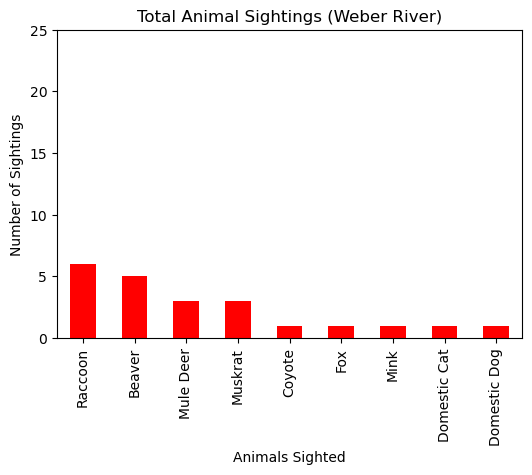

In [78]:
wr_animal_sighted_totals_graph = wr_animal_sighted_totals.plot(kind="bar", facecolor="red", figsize=(6,4))
plt.title("Total Animal Sightings (Weber River)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,25)

In [79]:
#Identify sites w/ Otter sightings

otter_sites_df = cleaned_otter_data_df[cleaned_otter_data_df["Animal Sighted"] == "Otter"]
otter_sites_df


,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
115,Middle Provo River,13,3,3,Otter,1
140,Middle Provo River,15,4,NaN,Otter,1
218,Middle Provo River,27,NaN,NaN,Otter,2
234,Middle Provo River,30,NaN,NaN,Otter,1


In [91]:
#Create new dataframe with all data from Otter Sites only

animal_sighted_survey_13_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 13]
animal_sighted_survey_15_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 15]
animal_sighted_survey_27_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 27]
animal_sighted_survey_30_df = middle_provo_river_df[middle_provo_river_df["Survey #"] == 30]

animal_sighted_otter_survey_list = [
    animal_sighted_survey_13_df,
    animal_sighted_survey_15_df,
    animal_sighted_survey_27_df,
    animal_sighted_survey_30_df
]

merged_otter_site_df = pd.concat(animal_sighted_otter_survey_list)
merged_otter_site_df

,Location,Survey #,Camera #,SD Card,Animal Sighted,Animal Count
111,Middle Provo River,13,4,4,Great Blue Heron,1
112,Middle Provo River,13,4,4,Mule Deer,2
113,Middle Provo River,13,4,4,Magpie,2
114,Middle Provo River,13,4,4,Muskrat,1
115,Middle Provo River,13,3,3,Otter,1
116,Middle Provo River,13,3,3,Beaver,1
117,Middle Provo River,13,3,3,Red-Winged Blackbird,1
118,Middle Provo River,13,3,3,Yellow Headed Blackbird,1
119,Middle Provo River,13,3,3,Domestic Dog,1
120,Middle Provo River,13,3,3,Elk,1


In [81]:
os_animal_sighted_totals_df = pd.DataFrame(merged_otter_site_df["Animal Sighted"].value_counts())
os_animal_sighted_totals_df.columns =["Count"]
os_animal_sighted_totals_df

,Count
Animal Sighted,
Great Blue Heron,5
Otter,4
Mule Deer,3
Raccoon,2
Magpie,2
Spotted Sandpiper,2
Sea Gull,1
Killdeer,1
Fox,1


In [82]:
os_total_animal_sightings_count = merged_otter_site_df["Animal Sighted"].count()
os_total_animal_sightings_count

31

In [83]:
# Create a new column for sighting probability for each animal sighted at otter sites:
os_animal_sighted_totals_df["Sighting Probability"] = os_animal_sighted_totals_df["Count"] / os_total_animal_sightings_count
os_sighting_probabilities = os_animal_sighted_totals_df
os_sighting_probabilities

,Count,Sighting Probability
Animal Sighted,,
Great Blue Heron,5,0.161290
Otter,4,0.129032
Mule Deer,3,0.096774
Raccoon,2,0.064516
Magpie,2,0.064516
Spotted Sandpiper,2,0.064516
Sea Gull,1,0.032258
Killdeer,1,0.032258
Fox,1,0.032258


In [84]:
otter_site_animal_sighted_totals = merged_otter_site_df["Animal Sighted"].value_counts()
otter_site_animal_sighted_totals

Animal Sighted
Great Blue Heron           5
Otter                      4
Mule Deer                  3
Raccoon                    2
Magpie                     2
Spotted Sandpiper          2
Sea Gull                   1
Killdeer                   1
Fox                        1
Unidentified Rodent        1
Robin                      1
Elk                        1
Mallard Duck               1
Domestic Dog               1
Yellow Headed Blackbird    1
Red-Winged Blackbird       1
Beaver                     1
Muskrat                    1
Canada Goose               1
Name: count, dtype: int64

(0.0, 6.0)

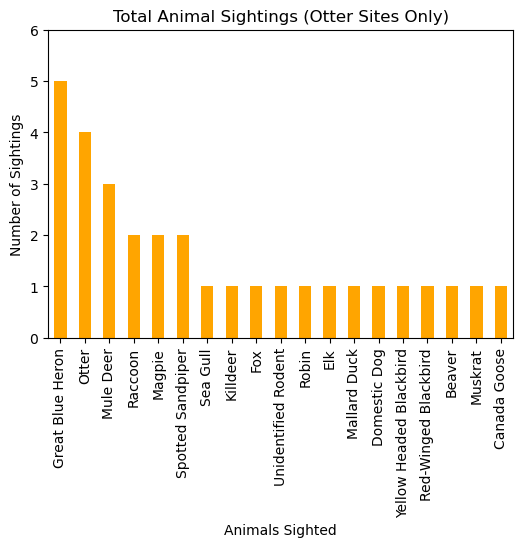

In [85]:
otter_site_animal_sighted_totals_graph = otter_site_animal_sighted_totals.plot(kind="bar", facecolor="orange", figsize=(6,4))
plt.title("Total Animal Sightings (Otter Sites Only)")
plt.xlabel("Animals Sighted")
plt.ylabel("Number of Sightings")
plt.ylim(0,6)

In [89]:
otter_site_mpr_survey_13_df = animal_sighted_survey_13_df[animal_sighted_survey_13_df["Animal Sighted"] != "Otter"]
otter_site_mpr_survey_13_df = otter_site_mpr_survey_13_df.drop(["Location", "Camera #", "SD Card", "Animal Count"], axis=1)
otter_site_mpr_survey_13_df = otter_site_mpr_survey_13_df.reset_index(drop=True)
otter_site_mpr_survey_13_df

,Survey #,Animal Sighted
0,13,Great Blue Heron
1,13,Mule Deer
2,13,Magpie
3,13,Muskrat
4,13,Beaver
5,13,Red-Winged Blackbird
6,13,Yellow Headed Blackbird
7,13,Domestic Dog
8,13,Elk
9,13,Great Blue Heron


In [92]:
otter_site_mpr_survey_15_df = animal_sighted_survey_15_df[animal_sighted_survey_15_df["Animal Sighted"] != "Otter"]
otter_site_mpr_survey_15_df = otter_site_mpr_survey_15_df.drop(["Location", "Camera #", "SD Card", "Animal Count"], axis=1)
otter_site_mpr_survey_15_df = otter_site_mpr_survey_15_df.reset_index(drop=True)
otter_site_mpr_survey_15_df

,Survey #,Animal Sighted
0,15,Great Blue Heron
1,15,Great Blue Heron
2,15,Raccoon
3,15,Spotted Sandpiper
4,15,Mule Deer
5,15,Unidentified Rodent


In [93]:
otter_site_mpr_survey_27_df = animal_sighted_survey_27_df[animal_sighted_survey_27_df["Animal Sighted"] != "Otter"]
otter_site_mpr_survey_27_df = otter_site_mpr_survey_27_df.drop(["Location", "Camera #", "SD Card", "Animal Count"], axis=1)
otter_site_mpr_survey_27_df = otter_site_mpr_survey_27_df.reset_index(drop=True)
otter_site_mpr_survey_27_df

,Survey #,Animal Sighted
0,27,Great Blue Heron
1,27,Fox
2,27,Killdeer
3,27,Sea Gull


In [94]:
otter_site_mpr_survey_30_df = animal_sighted_survey_30_df[animal_sighted_survey_30_df["Animal Sighted"] != "Otter"]
otter_site_mpr_survey_30_df = otter_site_mpr_survey_30_df.drop(["Location", "Camera #", "SD Card", "Animal Count"], axis=1)
otter_site_mpr_survey_30_df = otter_site_mpr_survey_30_df.reset_index(drop=True)
otter_site_mpr_survey_30_df

,Survey #,Animal Sighted
0,30,Mule Deer
1,30,Magpie
2,30,Canada Goose


In [ ]:
#Need to adjust for expected number of sightings per survey. 
#Calculate expected animal sighting number as mean or median number of sightings per survey and then adjust all probabilities accordingly.
    #Use loc in overall dataframe to get animal sighting count for each unique Location and Survey number pairing (?)
#For each locations, multiply expected animal sightings number by number of surveys performed in each location)

In [ ]:
#Make new table w/ otter site surveys as rows, and animals sighted as columns. Add probabilities as contents of table

In [ ]:
#?
#Bin animal species into categories: 
    #mammals: aquatic mammals, large predatory mammals, ruminant mammals, scavenger mammals, domestic mammals, rodents
    #birds: waterfowl, predatory birds, other birds
    #insects
    #fish



In [ ]:
#correspondence analysis? https://www.geeksforgeeks.org/what-is-correspondence-analysis/
#build manually?

#chi squared?

#Make a probability table for otter sites: probability of each animal getting sighted. 
#can make a grid or a heat map from probability table 